In [36]:
import numpy as np
import pandas as pd
import numpy.random as rng
import json
import matplotlib.pyplot as plt

# Plot Evaluation Results

In [37]:
with open('evaluation_results.json', 'r') as f:
    cfg = json.load(f)

In [38]:
output_cols = cfg['output_cols']
labels = [l.replace('process_','') for l in output_cols]
model_names = [m['name'] for m in cfg['models']]

cols = []
for m in cfg['models']:
    cols.append([m['test_mae_by_output'][c] for c in output_cols])
cols = np.array(cols)

results_df = pd.DataFrame(data=np.array(cols), columns=labels, index=model_names).T
results_df
#means_df = pd.DataFrame(data=np.array(mean_maes).T, columns=model_names, index=labels)

,Null,ANN
Hydrogen,0.000014,0.000014
Methane,0.000064,0.000063
Ethane,0.001353,0.000312
Propane,0.007271,0.000470
i-Butane,0.009345,0.000467
n-Butane,0.005903,0.000320
i-Pentane,0.004313,0.002756
n-Pentane,0.004108,0.002641
Cyclopentane,0.000050,0.000009
22-Mbutane,0.012420,0.005428


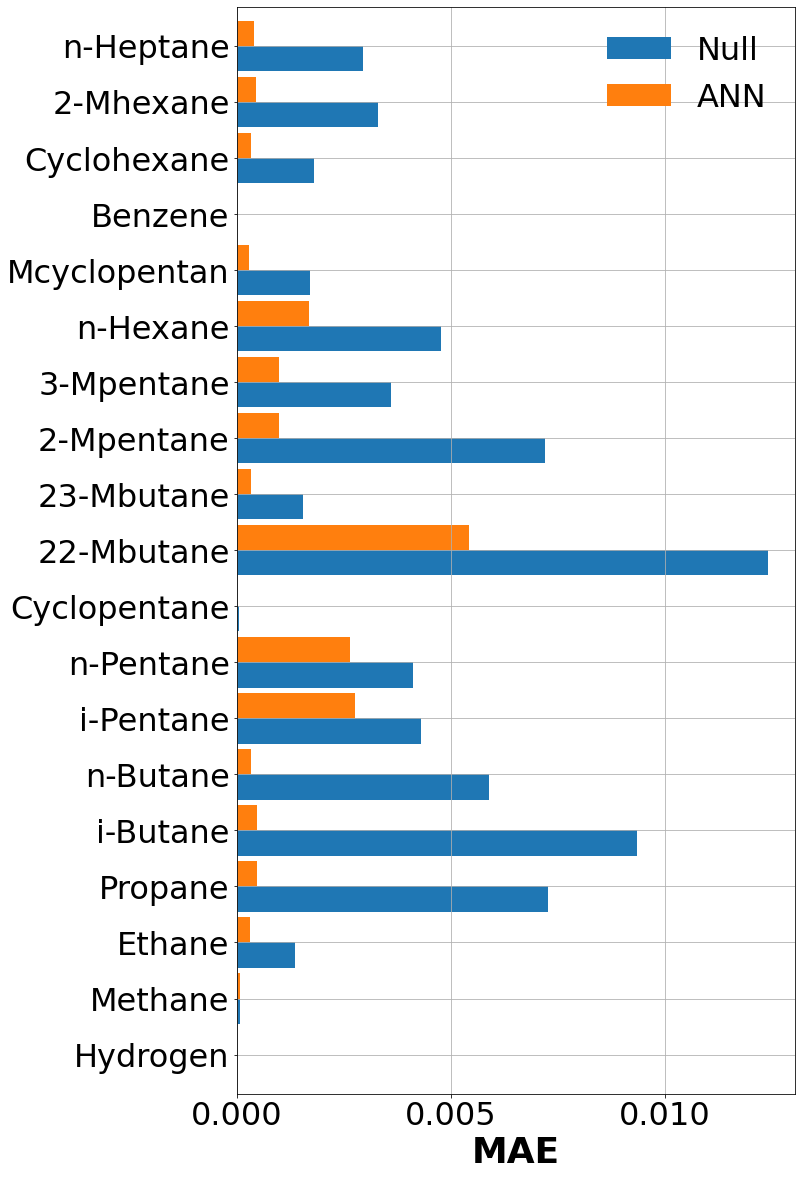

In [39]:
f, ax = plt.subplots(1, 1, figsize=(10, 20))
results_df.plot.barh(ax=ax, width=0.90)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
ax.set_ylabel('')
ax.set_xlabel('MAE', fontsize=36, fontweight='bold')
ax.grid(True)
ax.legend(fontsize=32, frameon=False)